<a href="https://colab.research.google.com/github/VitorFaccio1/InteligenciaArtificial1_Uniara/blob/main/GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

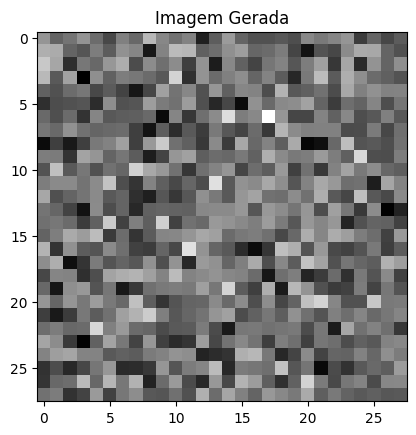

In [16]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Definindo a classe Generator, que representa a nossa rede neural geradora
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        # Definindo a estrutura da rede neural usando nn.Sequential
        self.model = nn.Sequential(
            nn.Linear(100, 256),   # Camada totalmente conectada que transforma a entrada de 100 dimensões para 256 dimensões
            nn.ReLU(),            # Função de ativação ReLU que introduz não-linearidade (ajuda a rede a aprender padrões complexos)
            nn.Linear(256, 512),  # Outra camada totalmente conectada que expande a dimensão de 256 para 512
            nn.ReLU(),            # Função de ativação ReLU novamente
            nn.Linear(512, 1024), # Camada totalmente conectada que expande a dimensão de 512 para 1024
            nn.ReLU(),            # Função de ativação ReLU novamente
            nn.Linear(1024, 784), # Camada final que reduz a dimensão de 1024 para 784 (28x28 pixels, tamanho de uma imagem)
            nn.Tanh()             # Função de ativação Tanh para garantir que os valores de saída estejam no intervalo de -1 a 1
        )

    def forward(self, x):
        # Passa a entrada através da rede
        return self.model(x)

# Criando um vetor de ruído com dimensão de 100 (entrada para o gerador)
z = torch.randn(1, 100)  # '1' representa um lote com uma única amostra, '100' é a dimensão do vetor de ruído

# Inicializando a instância da classe Generator
generator = Generator()

# Gerando uma imagem com o vetor de ruído
generated_img = generator(z)

# Convertendo a saída para o formato de imagem (28x28 pixels)
generated_img = generated_img.view(28, 28).detach().numpy()

# Exibindo a imagem gerada
plt.imshow(generated_img, cmap='gray')  # Mostra a imagem em escala de cinza
plt.title('Imagem Gerada')  # Adiciona um título à imagem
plt.show()  # Exibe a imagem